Importing Required Libraries and Loading CSV file

In [ ]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
train = pd.read_csv('titanic.csv')


Exploratory Data Analysis Finding Missing Data



In [ ]:
train.isnull().sum()

Survived                   0
Pclass                     2
Name                       0
Sex                        3
Age                        2
Siblings/Spouses Aboard    0
Parents/Children Aboard    1
Fare                       2
dtype: int64

The columns having null values are : Pclass,Sex,Age,Parents/Children Aboard,Fare.

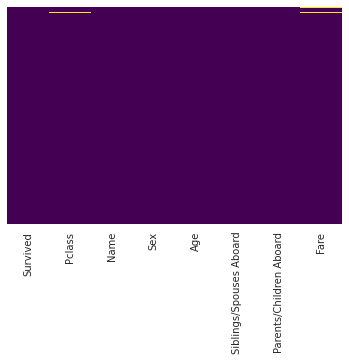

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

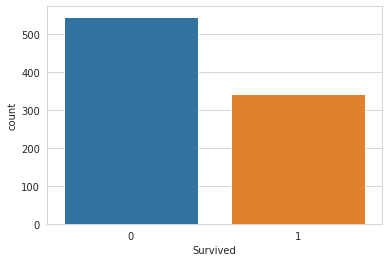

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

Here From above countplot, we infer that more than 500 people have not survived from the Titanic Accident.

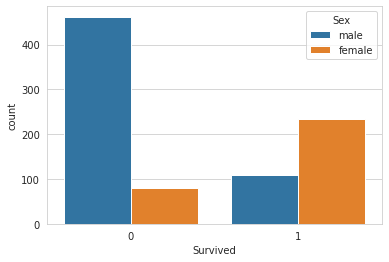

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train)

From above plot, most of the people who haven't survived are male.

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train)

Here We plot Survived people with Passenger Class. Class 3 people are affected more than class 1 and class 2. On the other hand, in Survived category, class 1 people were survived more than other classes.

Data cleaning

In data cleaning, we will be filling up missing values. For which, we boxplot Pclass and Age to find average of pclass of age and accordingly fill up values.

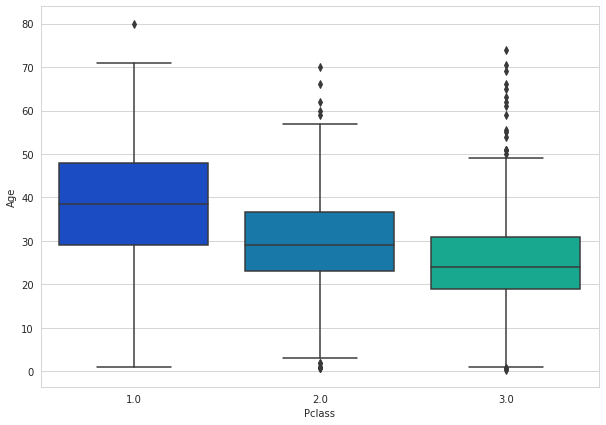

In [ ]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [ ]:
def impute_pclass(cols):
    Pclass = cols[0]
    Age = cols[1]
    
    if pd.isnull(Pclass):

        if Age == 37:
            return 1

        elif Age == 29:
            return 2

        else:
            return 3

    else:
        return Pclass

In [ ]:
train['Pclass'] = train[['Pclass','Age']].apply(impute_pclass,axis=1)

The above function fills pclass values of specific age. And when we perform heatmap, we observe that the pclass column has been filled up completely.

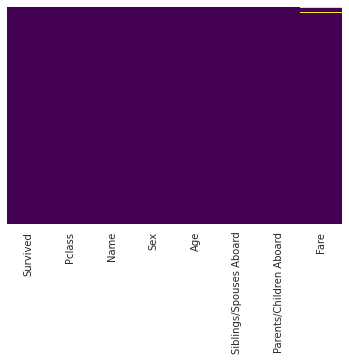

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Similarily, The above operations are performed to fill up other columns. Here Pclass VS Fare.

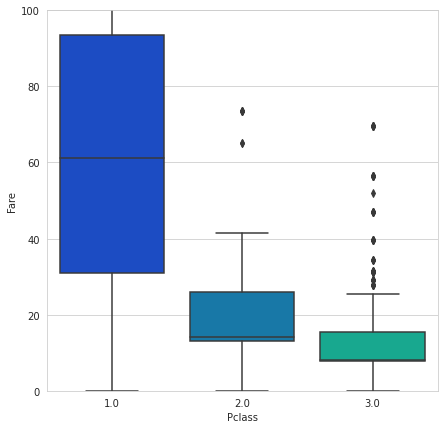

In [ ]:
plt.figure(figsize=(7, 7))
plt.ylim(0,100)
sns.boxplot(x='Pclass',y='Fare',data=train,palette='winter')

In [ ]:
def impute_fare(cols):
    Fare = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Fare):

        if Pclass == 1:
            return 61.1

        elif Pclass == 2:
            return 16.666

        else:
            return 10.576

    else:
        return Fare

In [ ]:
train['Fare'] = train[['Fare','Age']].apply(impute_fare,axis=1)

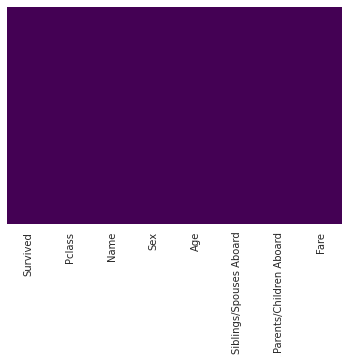

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Sex VS Survived

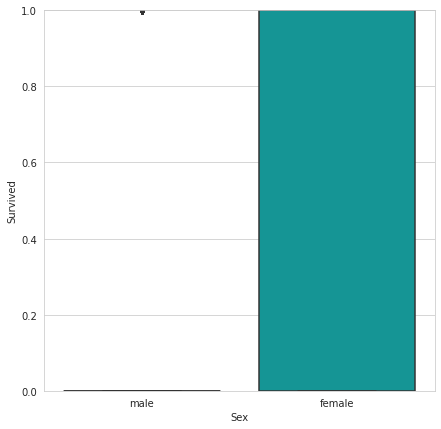

In [ ]:
plt.figure(figsize=(7, 7))
plt.ylim(0,1)
sns.boxplot(x='Sex',y='Survived',data=train,palette='winter')

In [116]:
def impute_sex(cols):
    sex = cols[0]
    survived = cols[1]
    
    if pd.isnull(sex):

        if survived == 1:
            return "Female"
        else:
            return "male"

    else:
        return sex

In [ ]:
train['Sex'] = train[['Sex','Survived']].apply(impute_sex,axis=1)

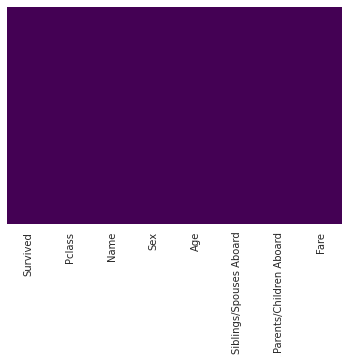

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Age VS Pclass 

In [ ]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 23

    else:
        return Age

In [ ]:
train['Age'] = train[['Age','Pclass']].apply(impute_pclass,axis=1)

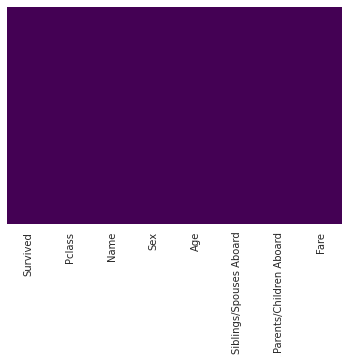

In [118]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Pclass Vs Parents/Children Abroad

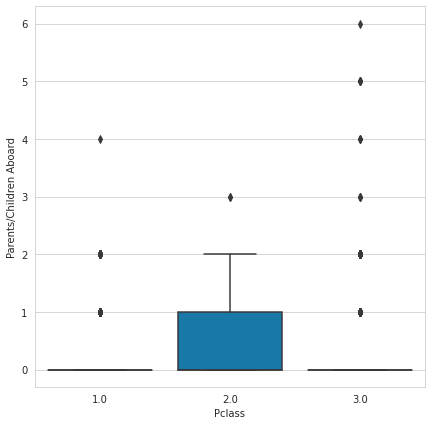

In [ ]:
plt.figure(figsize=(7, 7))
#plt.ylim(0,100)
sns.boxplot(x='Pclass',y='Parents/Children Aboard',data=train,palette='winter')

In [117]:
def impute_parents(cols):
    parents = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(parents):

        if Pclass == 2:
            return 1
        else:
            return 0

    else:
        return parents

In [114]:
train['Parents/Children Aboard'] = train[['Parents/Children Aboard','Pclass']].apply(impute_pclass,axis=1)

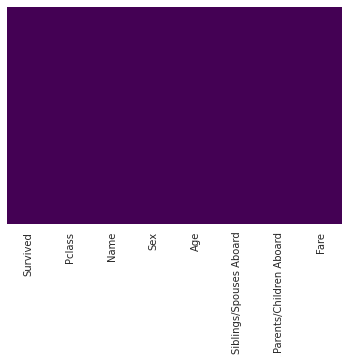

In [119]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Now Using info() method, the values of every column is checked if it is completely filled or not.

In [115]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    float64
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    float64
 7   Fare                     887 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 55.6+ KB


In [121]:
train.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

Hence The exploratory data analysis is performed on titanic dataset and from above we infer that all the columns are filled completely.